In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import statsmodels.stats.api as sms
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_table("http://www.econometrics.com/comdata/gujarati/data_15.7.shd", header = None,
                    delim_whitespace = True,
                    names = ["Fumador","Edad","Escolaridad","Ingresos","Pcigs79"])
data.head()

,Fumador,Edad,Escolaridad,Ingresos,Pcigs79
0,0,21,12.0,8500,60.6
1,1,28,15.0,12500,60.6
2,0,67,10.0,12500,60.6
3,0,20,12.0,12500,60.6
4,1,32,12.0,20000,60.6


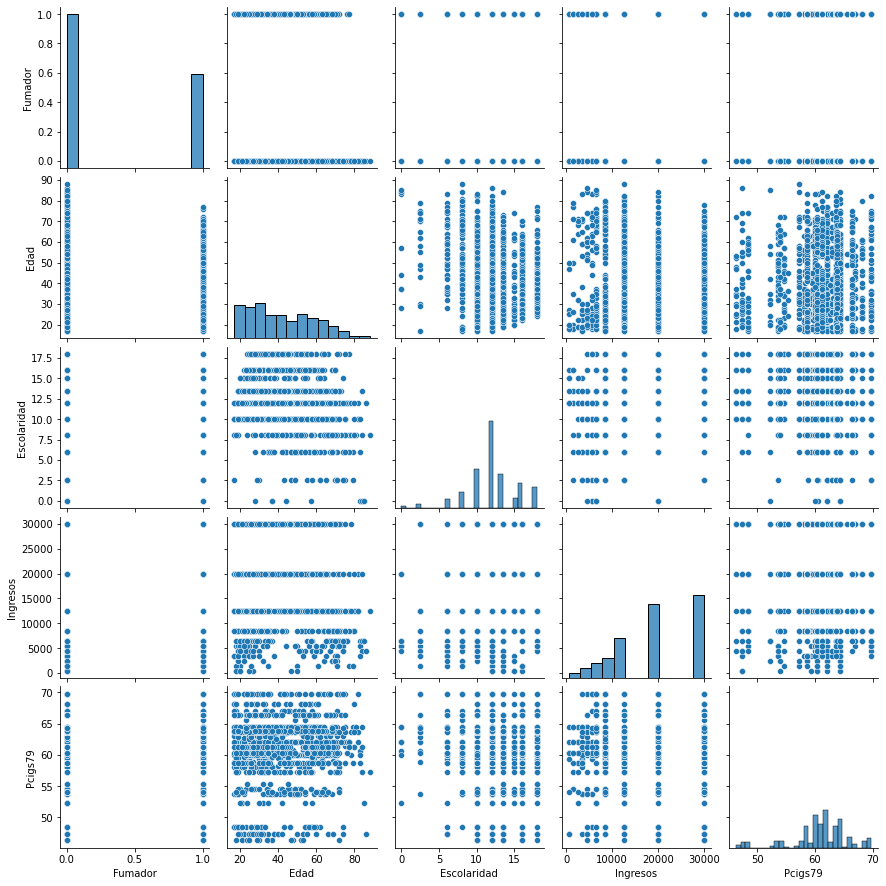

In [3]:
grafico = sns.pairplot(data)
plt.show()

In [4]:
data.describe()

,Fumador,Edad,Escolaridad,Ingresos,Pcigs79
count,1196.000000,1196.000000,1196.000000,1196.000000,1196.000000
mean,0.380435,41.806856,12.221154,19304.765886,60.984950
std,0.485697,17.056941,3.275847,9083.511331,4.848666
min,0.000000,17.000000,0.000000,500.000000,46.300000
25%,0.000000,27.000000,10.000000,12500.000000,59.225000
50%,0.000000,39.000000,12.000000,20000.000000,62.100000
75%,1.000000,56.000000,13.500000,30000.000000,63.800000
max,1.000000,88.000000,18.000000,30000.000000,69.800000


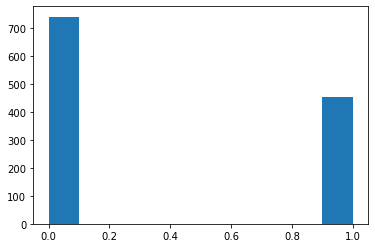

In [5]:
fig, ax = plt.subplots()
ax.hist(data["Fumador"])
plt.show()

### MPL

In [6]:
data.columns

Index(['Fumador', 'Edad', 'Escolaridad', 'Ingresos', 'Pcigs79'], dtype='object')

In [7]:
Y = data["Fumador"]
X = data[["Edad","Escolaridad","Ingresos","Pcigs79"]]

In [8]:
MLP = sm.OLS(Y, sm.add_constant(X))
resultados_MLP = MLP.fit()
print(resultados_MLP.summary())

                            OLS Regression Results                            
Dep. Variable:                Fumador   R-squared:                       0.039
Model:                            OLS   Adj. R-squared:                  0.036
Method:                 Least Squares   F-statistic:                     12.01
Date:                Fri, 24 Jun 2022   Prob (F-statistic):           1.43e-09
Time:                        10:09:58   Log-Likelihood:                -809.19
No. Observations:                1196   AIC:                             1628.
Df Residuals:                    1191   BIC:                             1654.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           1.1231      0.188      5.963      

In [9]:
MLP_marg_eff = resultados_MLP.params
MLP_marg_eff

const          1.123089
Edad          -0.004726
Escolaridad   -0.020613
Ingresos       0.000001
Pcigs79       -0.005132
dtype: float64

In [10]:
prediccion_MLP = resultados_MLP.predict()
prediccion_MLP = pd.DataFrame(prediccion_MLP, columns = ["Prediccion MLP"])
prediccion_MLP

,Prediccion MLP
0,0.474223
1,0.383404
2,0.302143
3,0.483054
4,0.434032
...,...
1191,0.493202
1192,0.283643
1193,0.406625
1194,0.317969


In [11]:
prediccion_MLP.describe()

,Prediccion MLP
count,1196.000000
mean,0.380435
std,0.095634
min,0.082277
25%,0.312457
50%,0.382332
75%,0.449707
max,0.677722


In [12]:
residuos = resultados_MLP.resid
resultado_test = sms.jarque_bera(residuos)
nombres = ["JB","P-Value JB","Asimetría","Curtosis"]
pd.Series(resultado_test,nombres) # H0 = Normalidad 

JB            1.735227e+02
P-Value JB    2.089412e-38
Asimetría     4.491822e-01
Curtosis      1.364457e+00
dtype: float64

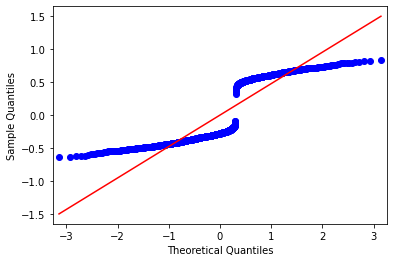

In [13]:
fig, ax = plt.subplots()
probplot = sm.ProbPlot(residuos)
probplot.qqplot(line="s", ax = ax)
plt.show()

### Modelo Logit

In [14]:
modelo_logit = sm.Logit(Y, sm.add_constant(X))
resultados_logit = modelo_logit.fit()
print(resultados_logit.summary())

Optimization terminated successfully.
         Current function value: 0.644516
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:                Fumador   No. Observations:                 1196
Model:                          Logit   Df Residuals:                     1191
Method:                           MLE   Df Model:                            4
Date:                Fri, 24 Jun 2022   Pseudo R-squ.:                 0.02975
Time:                        10:09:58   Log-Likelihood:                -770.84
converged:                       True   LL-Null:                       -794.47
Covariance Type:            nonrobust   LLR p-value:                 1.341e-09
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const           2.7451      0.829      3.311      0.001       1.120       4.370
Edad           -0.0209    

In [15]:
logit_marg_eff = resultados_logit.get_margeff()
print(logit_marg_eff.summary())

        Logit Marginal Effects       
Dep. Variable:                Fumador
Method:                          dydx
At:                           overall
                 dy/dx    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
Edad           -0.0047      0.001     -5.864      0.000      -0.006      -0.003
Escolaridad    -0.0206      0.005     -4.539      0.000      -0.030      -0.012
Ingresos     1.069e-06   1.62e-06      0.659      0.510   -2.11e-06    4.25e-06
Pcigs79        -0.0051      0.003     -1.798      0.072      -0.011       0.000


In [16]:
logit_marg_eff = resultados_logit.get_margeff(at = "mean")
print(logit_marg_eff.summary())

        Logit Marginal Effects       
Dep. Variable:                Fumador
Method:                          dydx
At:                              mean
                 dy/dx    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
Edad           -0.0049      0.001     -5.598      0.000      -0.007      -0.003
Escolaridad    -0.0213      0.005     -4.411      0.000      -0.031      -0.012
Ingresos     1.107e-06   1.68e-06      0.658      0.510   -2.19e-06     4.4e-06
Pcigs79        -0.0052      0.003     -1.790      0.073      -0.011       0.000


**Ejercicio modelo LOGIT con escolaridad únicamente de más de 10 años**

In [17]:
data_ejercicio = _____________

NameError: name '_____________' is not defined

### Modelo Probit

In [18]:
modelo_probit = sm.Probit(Y,sm.add_constant(X))
resultados_probit = modelo_probit.fit()
print(resultados_probit.summary())

Optimization terminated successfully.
         Current function value: 0.644304
         Iterations 5
                          Probit Regression Results                           
Dep. Variable:                Fumador   No. Observations:                 1196
Model:                         Probit   Df Residuals:                     1191
Method:                           MLE   Df Model:                            4
Date:                Fri, 24 Jun 2022   Pseudo R-squ.:                 0.03007
Time:                        10:11:18   Log-Likelihood:                -770.59
converged:                       True   LL-Null:                       -794.47
Covariance Type:            nonrobust   LLR p-value:                 1.052e-09
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const           1.7019      0.511      3.333      0.001       0.701       2.703
Edad           -0.0130    

In [19]:
probit_marg_eff = resultados_probit.get_margeff()
print(probit_marg_eff.summary())

       Probit Marginal Effects       
Dep. Variable:                Fumador
Method:                          dydx
At:                           overall
                 dy/dx    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
Edad           -0.0048      0.001     -5.899      0.000      -0.006      -0.003
Escolaridad    -0.0207      0.005     -4.565      0.000      -0.030      -0.012
Ingresos     1.002e-06   1.62e-06      0.619      0.536   -2.17e-06    4.18e-06
Pcigs79        -0.0051      0.003     -1.800      0.072      -0.011       0.000


In [20]:
probit_marg_eff = resultados_probit.get_margeff(at = "mean")
print(probit_marg_eff.summary())

       Probit Marginal Effects       
Dep. Variable:                Fumador
Method:                          dydx
At:                              mean
                 dy/dx    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
Edad           -0.0049      0.001     -5.666      0.000      -0.007      -0.003
Escolaridad    -0.0213      0.005     -4.455      0.000      -0.031      -0.012
Ingresos     1.032e-06   1.67e-06      0.619      0.536   -2.24e-06     4.3e-06
Pcigs79        -0.0052      0.003     -1.792      0.073      -0.011       0.000


**Ejercicio modelo PROBIT con escolaridad únicamente de más de 10 años**

In [21]:
from statsmodels.iolib.summary2 import summary_col

In [22]:
tabla = summary_col(results=[resultados_MLP,resultados_logit,resultados_probit],
                   model_names = ["MLP","Logit","Probit"], stars= True)
print(tabla)


                  MLP       Logit      Probit  
-----------------------------------------------
Edad           -0.0047*** -0.0209*** -0.0130***
               (0.0008)   (0.0037)   (0.0023)  
Escolaridad    -0.0206*** -0.0910*** -0.0562***
               (0.0046)   (0.0207)   (0.0126)  
Ingresos       0.0000     0.0000     0.0000    
               (0.0000)   (0.0000)   (0.0000)  
Pcigs79        -0.0051*   -0.0223*   -0.0138*  
               (0.0029)   (0.0125)   (0.0077)  
R-squared      0.0388                          
R-squared Adj. 0.0355                          
const          1.1231***  2.7451***  1.7019*** 
               (0.1884)   (0.8292)   (0.5106)  
Standard errors in parentheses.
* p<.1, ** p<.05, ***p<.01


In [23]:
coeficientes = ["Edad","Escolaridad","Ingresos","Pcigs79"]
efectos_logit = pd.DataFrame(logit_marg_eff.margeff,
                           index= coeficientes,
                           columns = ["Logit"])

efectos_probit = pd.DataFrame(probit_marg_eff.margeff,
                           index= coeficientes,
                           columns = ["Probit"])

efectos_MLP = pd.DataFrame(MLP_marg_eff[1:5],
                         columns = ["MLP"])

In [24]:
pd.concat([efectos_MLP, efectos_probit, efectos_logit], axis = 1)

,MLP,Probit,Logit
Edad,-0.004726,-0.004920,-0.004890
Escolaridad,-0.020613,-0.021340,-0.021334
Ingresos,0.000001,0.000001,0.000001
Pcigs79,-0.005132,-0.005235,-0.005234
